#### Model domain : single stream:  Length = 1000 m, Width = 1 m, dx = 10 m, dy= 1 m, Q = 0.1 m$^3$/sec
#### Mesh : generated mesh (not logical)
#### Diffusion = 0.0 m$^2$/sec, Dispersion = 0
#### Bondary condition : prescribed concentration at the inlet boundary face (x=0 m)
#### Initial condition : provided by pflotran (see data/pflotran_in/denitrification_reach.in)
#### Simulation time : 10 hours
#### Chemsitry: denitrification
#### Comparison with PFloTran denitrification results
#### Plotting: PFloTran and ATS DOM, Oxyten and Nitrate concentration [moles/Liter] in the entire stream at time = 10 hour
#### Note: this test is same as 01_stream denitrificaiton example but added one conversative (non-reactive) tracer 

In [1]:
import sys, os, math, h5py, csv
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
sys.path.append('/Users/ajc/Core/codes/simulator/debug/ats/tools/utils')
import read_helper as read
import seaborn as sns

In [2]:
path = '/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/01_stream'

In [3]:
# Read PFloTran-standalone data
pflotran_file = os.path.join(path, 'data/pflotran_out/denitrification_reach.tec')

plfotran_data = dict()
plfotran_data['X'] = np.loadtxt(pflotran_file,usecols=0,skiprows=3)  # reach spacing [m]
plfotran_data['DOM1'] = np.loadtxt(pflotran_file,usecols=3,skiprows=3)  # Dissolved organic matter [Molarity], Molarity = Moles/liter
plfotran_data['O2(aq)'] = np.loadtxt(pflotran_file,usecols=4,skiprows=3)  # Oxygen concentration [Molarity]
plfotran_data['NO3-'] = np.loadtxt(pflotran_file,usecols=5,skiprows=3)  # Nitrate concentration [Molarity-

In [7]:
F = ['srun3A'] # Test/simulation directory
F =['test1']
Files = [os.path.join(path,f,'visdump_surface_data.h5') for f in F]
Suffix = ['.cell.Tracer1 conc','.cell.DOM1 conc', '.cell.NO3- conc', '.cell.O2(aq) conc']
vars = ['surface-total_component_concentration', ]*len(Suffix)

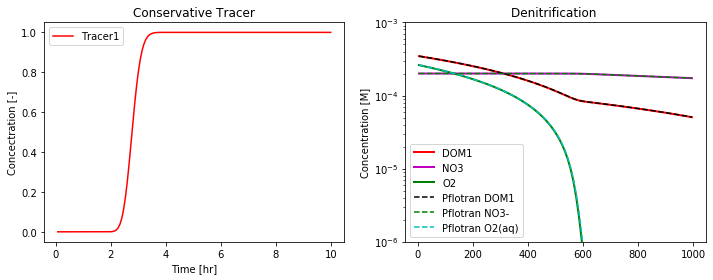

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
axs = axs.ravel()

Colors = ['r','r','m','g']
F_L = ['Tracer1','DOM1', 'NO3', 'O2']
for i, v in enumerate(vars):
    for j,f in enumerate(Files):
        if i ==0:
            #plt.subplot(121)
            data = np.array(read.GetSurfVarFromVis(f,v,cellid=99,suffix=Suffix[i])[v])
            Time = np.array([240*i/3600. for i in range(len(data))])
            axs[0].plot(Time, 1e-3*data,color=Colors[i],label=F_L[i])
            axs[0].set_title('Conservative Tracer')
            axs[0].legend(loc='upper left',fontsize=10)
            axs[0].set_xlabel('Time [hr]')
            axs[0].set_ylabel('Concectration [-]')
        else:
            dat = read.GetSurfVarFromVis_All(f,v,suffix=Suffix[i])[v]
            data = np.array(dat[-1])
            axs[1].semilogy(plfotran_data['X'],1e-3*data,color=Colors[i],label=F_L[i],linewidth=2)
axs[1].semilogy(plfotran_data['X'],plfotran_data['DOM1'],'k',linestyle='--',label='Pflotran DOM1')
axs[1].semilogy(plfotran_data['X'], plfotran_data['NO3-'],'g',linestyle='--',label='Pflotran NO3-')
axs[1].semilogy(plfotran_data['X'], plfotran_data['O2(aq)'],'c',linestyle='--',label='Pflotran O2(aq)')
axs[1].legend(loc='lower left',fontsize=10)
axs[1].set_ylabel('Concentration [M]') # Molarity = Moles/liter
axs[1].set_title('Denitrification ')
plt.tight_layout()
axs[1].set_ylim(1e-6,1e-3)
plt.show()
